In [70]:
#setup 

import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn

df = pd.read_csv('C:/Users/chloe/OneDrive/Desktop/ds_salaries.csv')
df.dropna(inplace=True)
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
#reading in data

work_years = df.work_year.unique()
experience_levels = df.experience_level.unique()
employment_types = df.employment_type.unique()
job_titles = sorted(df.job_title.unique())
remote_ratios = df.remote_ratio.unique()
salary_currencies = df.salary_currency.unique()
employee_residences = df.employee_residence.unique()
company_locations = df.company_location.unique()
company_sizes = df.company_size.unique()

print("Work Years:", work_years)
print("Experience Levels:", experience_levels)
print("Employment Types:", employment_types)
print("Salary Currencies:", salary_currencies)
print("Employee Residences:", employee_residences)
print("Company Locations:", company_locations)
print("Job Titles:", job_titles)

Work Years: [2020 2021 2022]
Experience Levels: ['MI' 'SE' 'EN' 'EX']
Employment Types: ['FT' 'CT' 'PT' 'FL']
Salary Currencies: ['EUR' 'USD' 'GBP' 'HUF' 'INR' 'JPY' 'CNY' 'MXN' 'CAD' 'DKK' 'PLN' 'SGD'
 'CLP' 'BRL' 'TRY' 'AUD' 'CHF']
Employee Residences: ['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']
Company Locations: ['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE']
Job Titles: ['3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist', 'Applied Machine Learning Scientist', 'BI Data Analyst', 'Big Data Arc

In [4]:
#salary statistics

salaries = df.salary.values.tolist()
salaries_in_usd = df.salary_in_usd.tolist()
average = round(sum(salaries_in_usd)/len(salaries_in_usd),2)
print("The salaries (USD) range from " + str(min(salaries_in_usd)) + " USD to " + str(max(salaries_in_usd)) + " USD")
print("The average salary (USD) is: " + str(average) + " USD")

The salaries (USD) range from 2859 USD to 600000 USD
The average salary (USD) is: 112297.87 USD


3D Computer Vision Researcher:
Average Salary: 5409.0 USD
Minimum Salary: 5409 USD
Maximum Salary: 5409 USD
Salary Range: 0 USD

AI Scientist:
Average Salary: 66135.57 USD
Minimum Salary: 12000 USD
Maximum Salary: 200000 USD
Salary Range: 188000 USD

Analytics Engineer:
Average Salary: 175000.0 USD
Minimum Salary: 135000 USD
Maximum Salary: 205300 USD
Salary Range: 70300 USD

Applied Data Scientist:
Average Salary: 175655.0 USD
Minimum Salary: 54238 USD
Maximum Salary: 380000 USD
Salary Range: 325762 USD

Applied Machine Learning Scientist:
Average Salary: 142068.75 USD
Minimum Salary: 31875 USD
Maximum Salary: 423000 USD
Salary Range: 391125 USD

BI Data Analyst:
Average Salary: 74755.17 USD
Minimum Salary: 9272 USD
Maximum Salary: 150000 USD
Salary Range: 140728 USD

Big Data Architect:
Average Salary: 99703.0 USD
Minimum Salary: 99703 USD
Maximum Salary: 99703 USD
Salary Range: 0 USD

Big Data Engineer:
Average Salary: 51974.0 USD
Minimum Salary: 5882 USD
Maximum Salary: 114047 USD


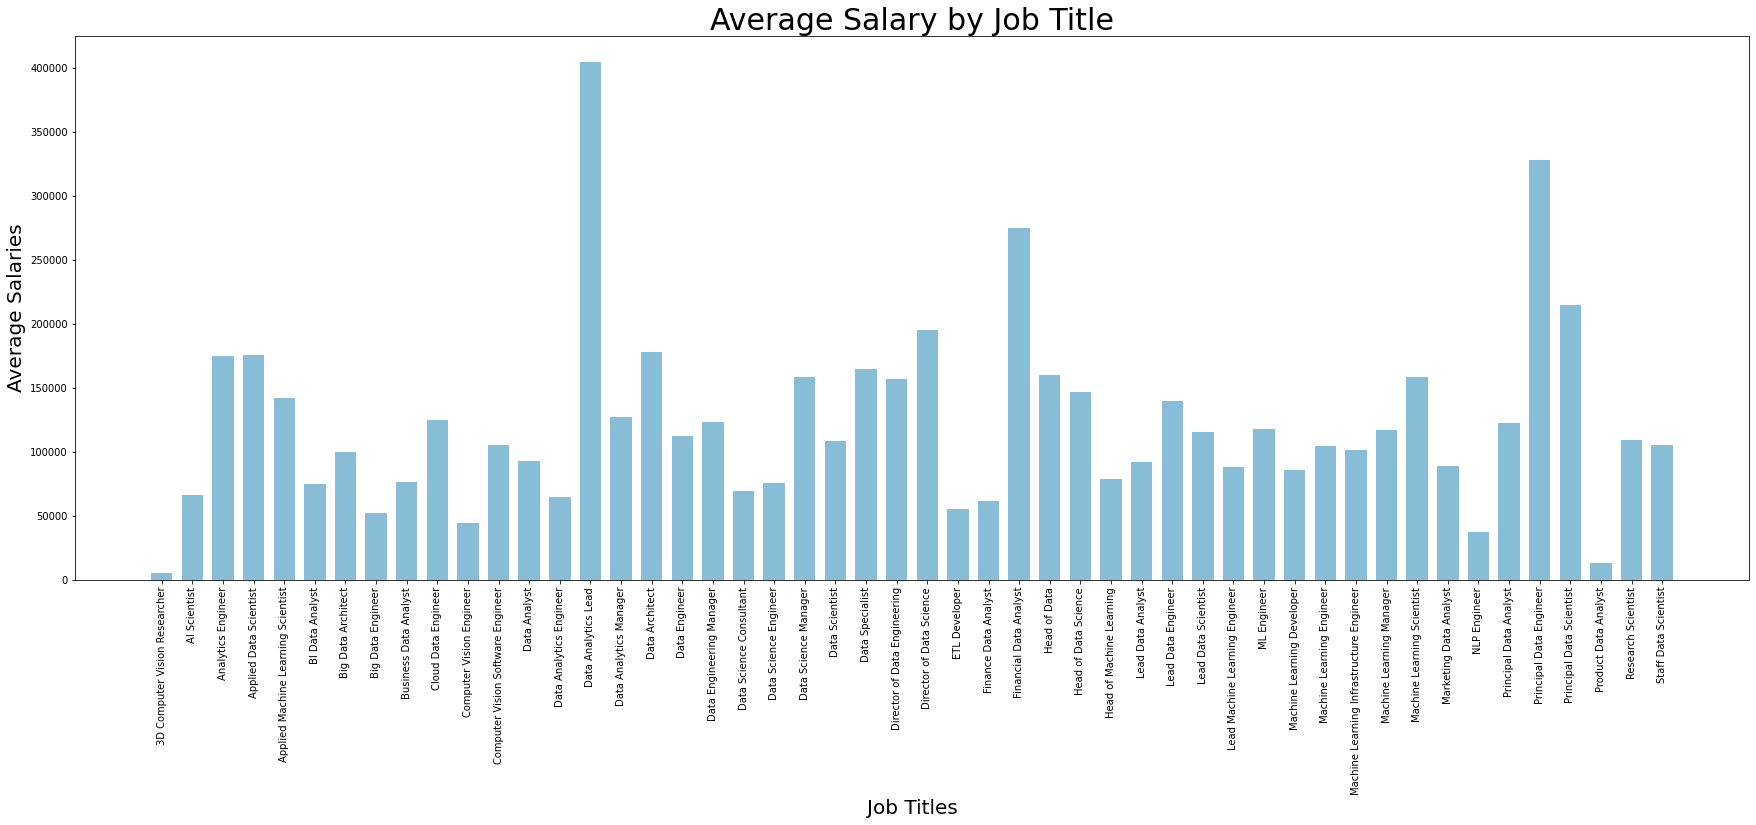

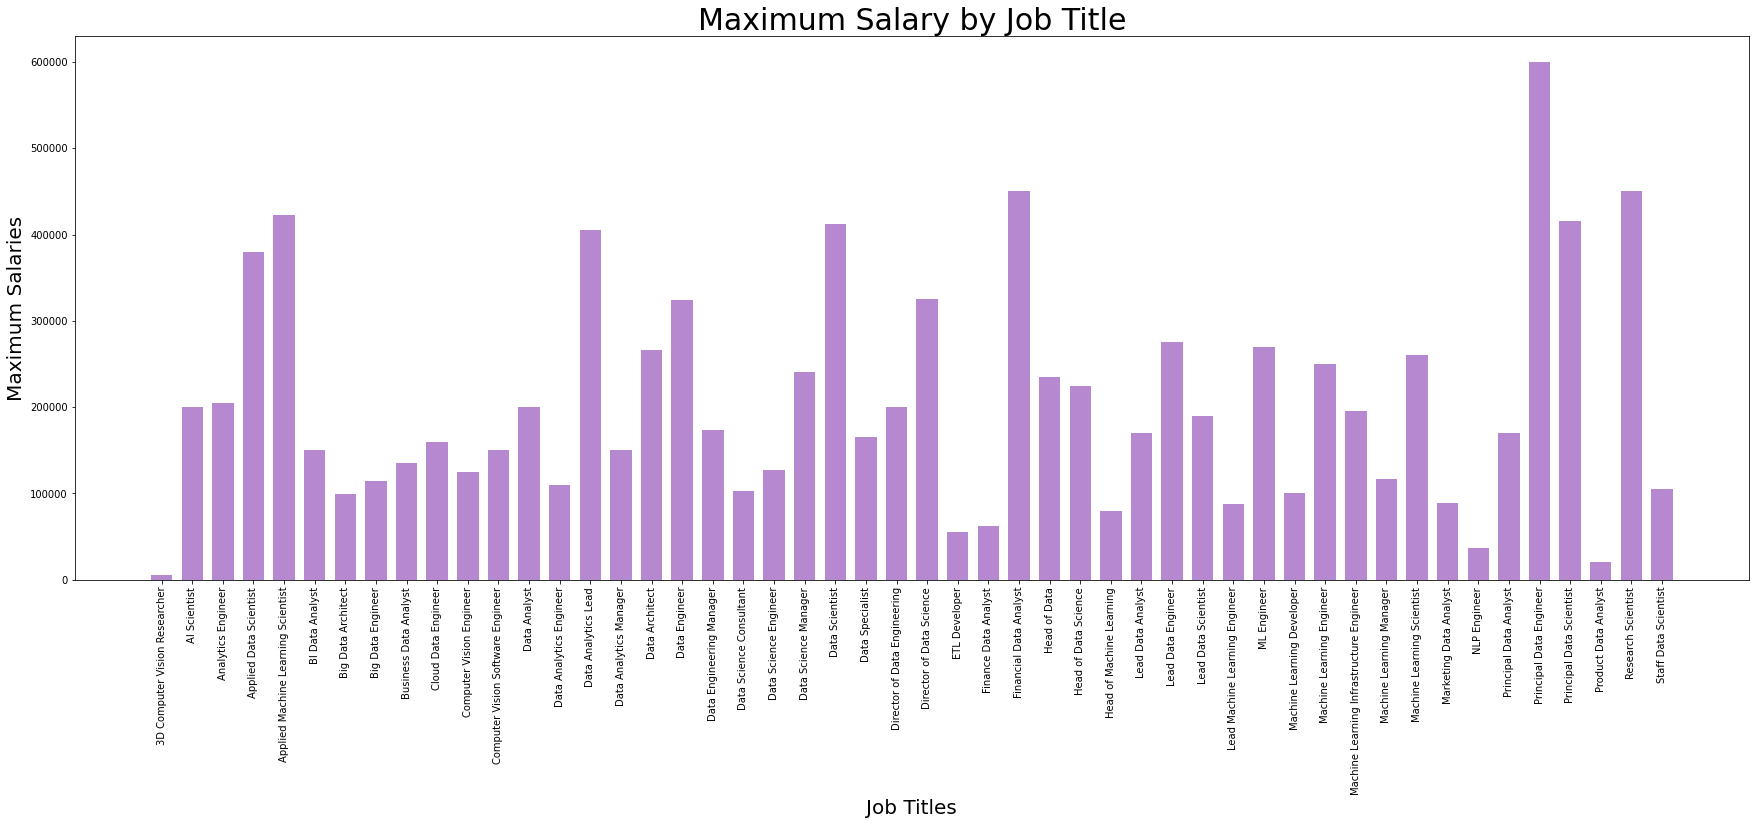

In [7]:
#salaries by job title

jobstats = {}
averages = []
maxes = []

#read in data
temp = df.groupby(['job_title'])
for x in range(len(job_titles)): 
    currentjob = job_titles[x]
    a = temp.get_group(currentjob)
    tempsalaries = a.salary_in_usd.values.tolist()
    tempavg = round(sum(tempsalaries)/len(tempsalaries),2)
    averages.append(tempavg)
    tempmin = min(tempsalaries)
    tempmax = max(tempsalaries)
    maxes.append(tempmax)
    temprange = tempmax - tempmin
    templist = [tempavg, tempmin, tempmax, temprange]
    jobstats[currentjob] = templist

#output data (by job title)
def stats_by_job():
    for key in jobstats: 
        print(key + ":")
        stats = jobstats[key]
        print("Average Salary: " + str(stats[0]) + " USD")
        print("Minimum Salary: " + str(stats[1]) + " USD")
        print("Maximum Salary: " + str(stats[2]) + " USD")
        print("Salary Range: " + str(stats[3]) + " USD")
        print("")

def plot_average():
    #average salary by job title 
    fig = plt.figure(figsize = (30,10))
    plt.bar(job_titles, averages, color = '#87bdd6', width = 0.7)
    plt.xlabel("Job Titles", fontsize = 20)
    plt.ylabel("Average Salaries", fontsize = 20)
    plt.title("Average Salary by Job Title", fontsize = 30)
    plt.xticks(rotation=90)
    plt.show

def plot_maximum():
    #maximum salary by job title 

    fig = plt.figure(figsize = (30,10))
    plt.bar(job_titles, maxes, color = '#b688cf', width = 0.7)
    plt.xlabel("Job Titles", fontsize = 20)
    plt.ylabel("Maximum Salaries", fontsize = 20)
    plt.title("Maximum Salary by Job Title", fontsize = 30)
    plt.xticks(rotation=90)
    plt.show

stats_by_job()
plot_average()
plot_maximum()

DE:
Average Salary: 81887.21 USD
Minimum Salary: 15966 USD
Maximum Salary: 173762 USD
Salary Range: 157796 USD

JP:
Average Salary: 114127.33 USD
Minimum Salary: 41689 USD
Maximum Salary: 260000 USD
Salary Range: 218311 USD

GB:
Average Salary: 81583.04 USD
Minimum Salary: 37300 USD
Maximum Salary: 183228 USD
Salary Range: 145928 USD

HN:
Average Salary: 20000.0 USD
Minimum Salary: 20000 USD
Maximum Salary: 20000 USD
Salary Range: 0 USD

US:
Average Salary: 144055.26 USD
Minimum Salary: 5679 USD
Maximum Salary: 600000 USD
Salary Range: 594321 USD

HU:
Average Salary: 35735.0 USD
Minimum Salary: 35735 USD
Maximum Salary: 35735 USD
Salary Range: 0 USD

NZ:
Average Salary: 125000.0 USD
Minimum Salary: 125000 USD
Maximum Salary: 125000 USD
Salary Range: 0 USD

FR:
Average Salary: 63970.67 USD
Minimum Salary: 36643 USD
Maximum Salary: 152000 USD
Salary Range: 115357 USD

IN:
Average Salary: 28581.75 USD
Minimum Salary: 5409 USD
Maximum Salary: 94665 USD
Salary Range: 89256 USD

PK:
Average 

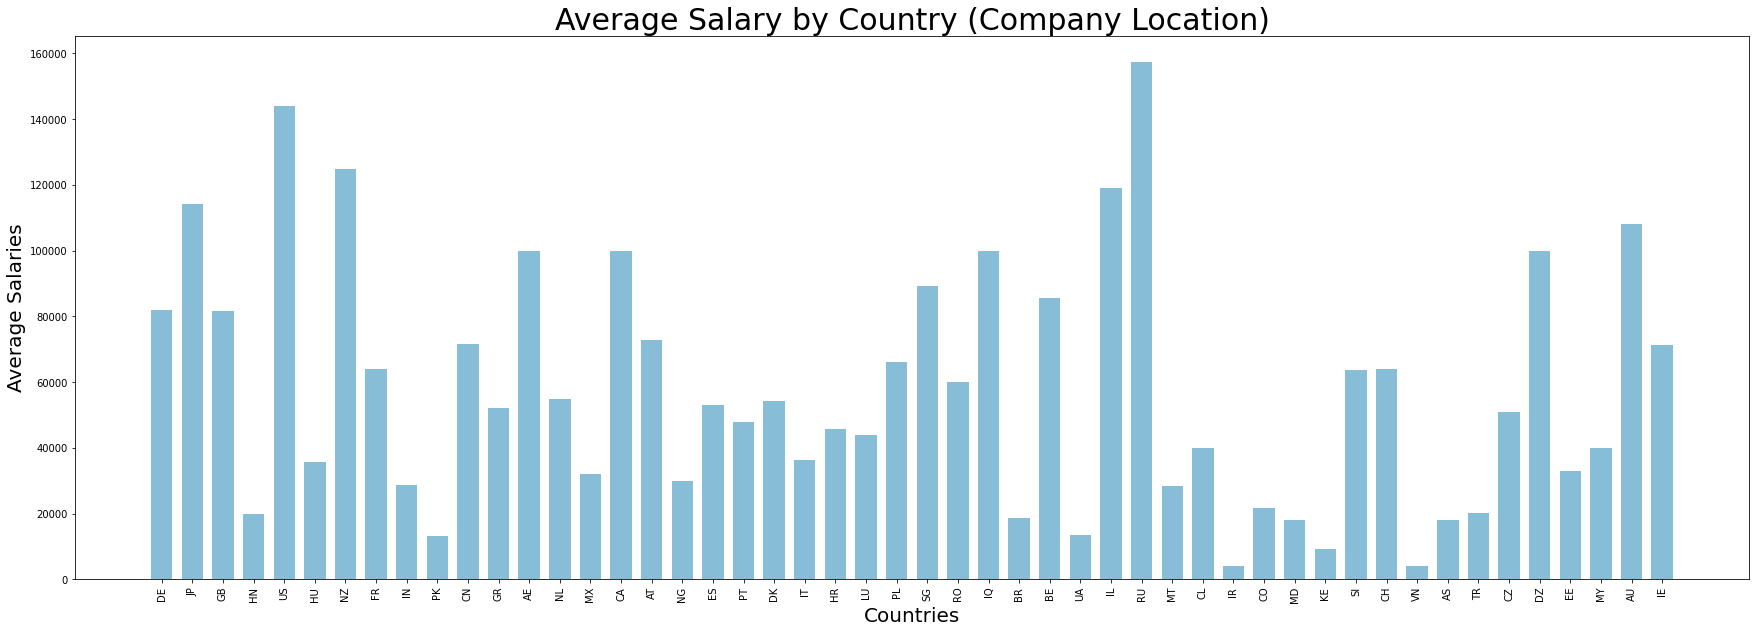

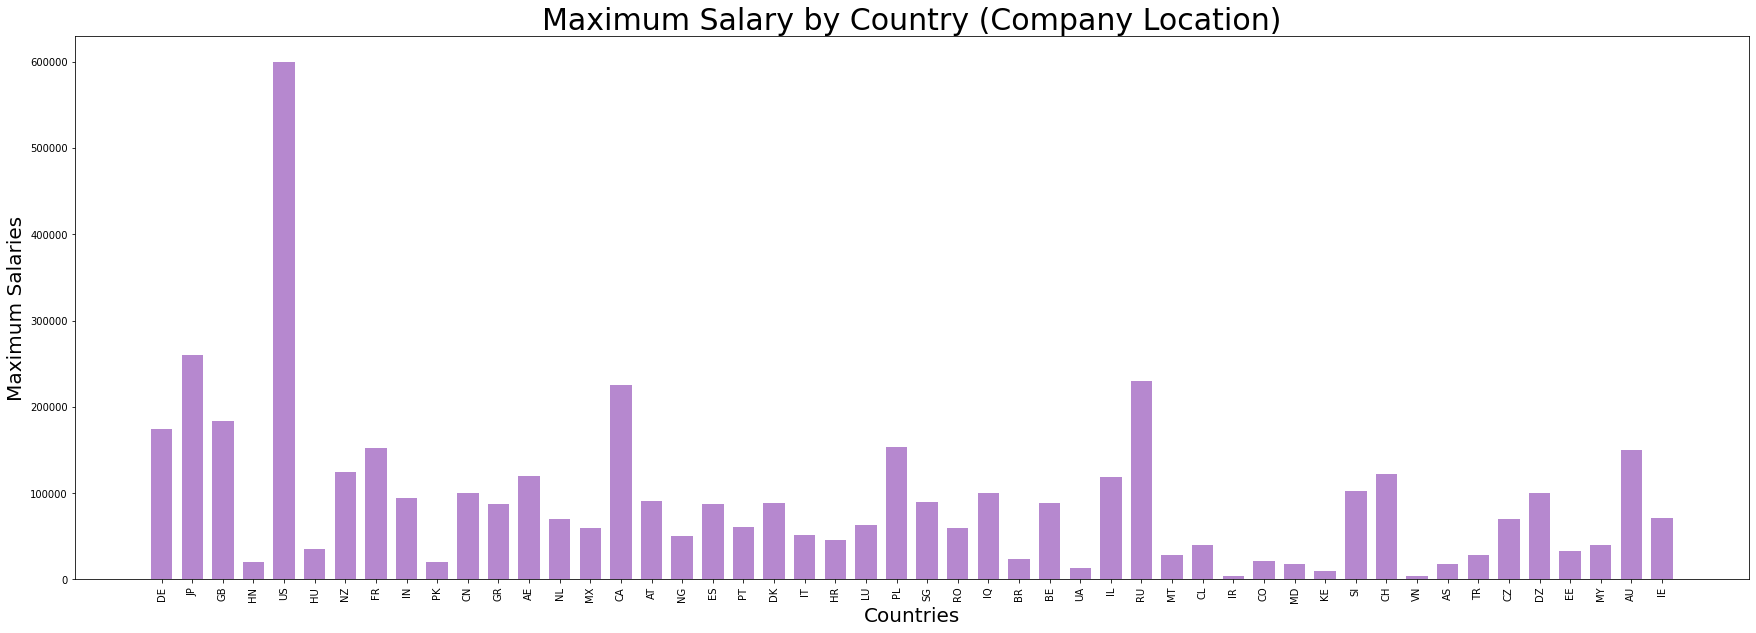

In [13]:

countrystats = {}
averages = []
maxes = []

#read in data
temp = df.groupby(['company_location'])
for x in range(len(company_locations)): 
    country = company_locations[x]
    a = temp.get_group(country)
    tempsalaries = a.salary_in_usd.values.tolist()
    tempavg = round(sum(tempsalaries)/len(tempsalaries),2)
    averages.append(tempavg)
    tempmin = min(tempsalaries)
    tempmax = max(tempsalaries)
    maxes.append(tempmax)
    temprange = tempmax - tempmin
    templist = [tempavg, tempmin, tempmax, temprange]
    countrystats[country] = templist

#output data (by country)
def stats_by_country():
    for key in countrystats: 
        print(key + ":")
        stats = countrystats[key]
        print("Average Salary: " + str(stats[0]) + " USD")
        print("Minimum Salary: " + str(stats[1]) + " USD")
        print("Maximum Salary: " + str(stats[2]) + " USD")
        print("Salary Range: " + str(stats[3]) + " USD")
        print("")

def plot_average():
    #average salary by job title 
    fig = plt.figure(figsize = (30,10))
    plt.bar(company_locations, averages, color = '#87bdd6', width = 0.7)
    plt.xlabel("Countries", fontsize = 20)
    plt.ylabel("Average Salaries", fontsize = 20)
    plt.title("Average Salary by Country (Company Location)", fontsize = 30)
    plt.xticks(rotation=90)
    plt.show

def plot_maximum():
    #maximum salary by job title 

    fig = plt.figure(figsize = (30,10))
    plt.bar(company_locations, maxes, color = '#b688cf', width = 0.7)
    plt.xlabel("Countries", fontsize = 20)
    plt.ylabel("Maximum Salaries", fontsize = 20)
    plt.title("Maximum Salary by Country (Company Location)", fontsize = 30)
    plt.xticks(rotation=90)
    plt.show

stats_by_country()
plot_average()
plot_maximum()


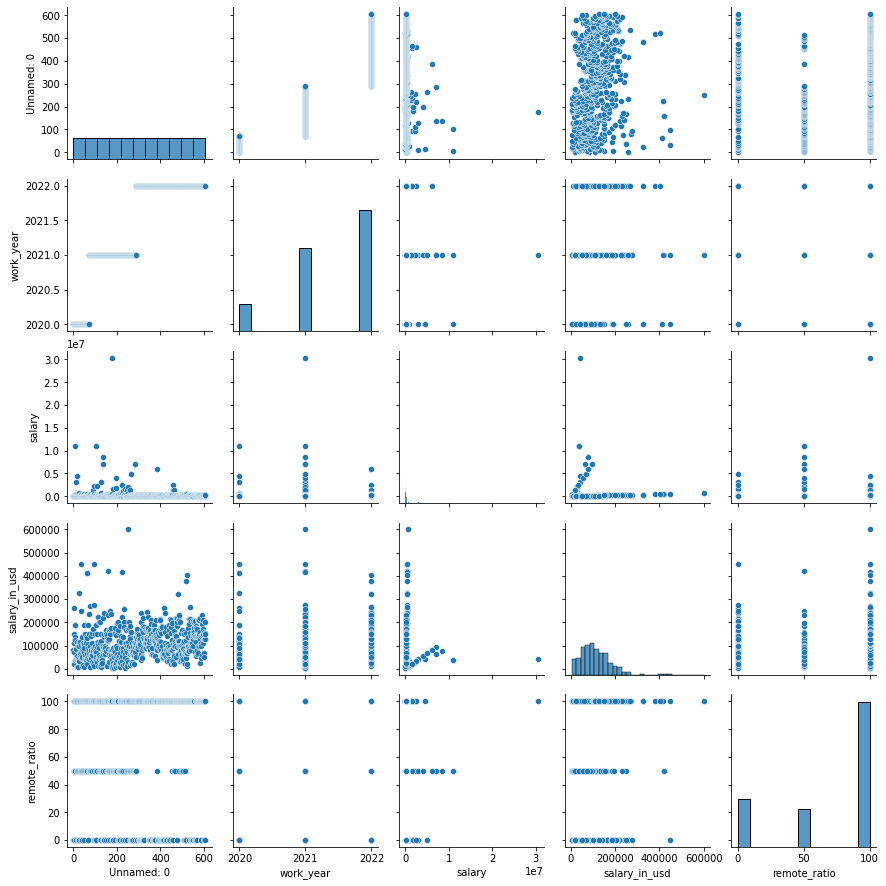

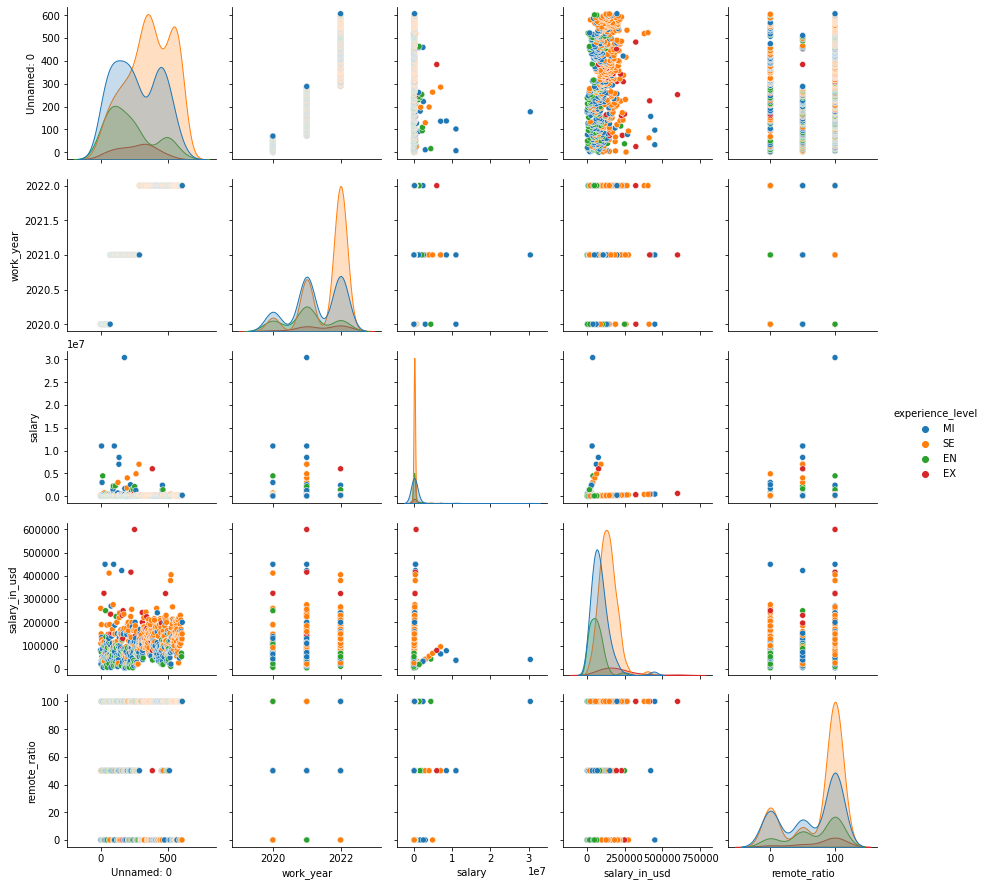

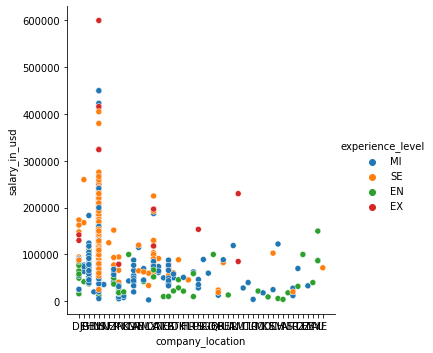

In [29]:
#general plotting to visualise clusters
#seaborn practice

seaborn.pairplot(df)
plt.show()

seaborn.pairplot(df,hue="experience_level")
plt.show()

seaborn.relplot(data=df, x ="company_location", y="salary_in_usd", hue="experience_level")
plt.show()

In [99]:
#replace non-numerical with numerical data
from cgi import test


X = df[['job_title']]
y = df['salary_in_usd']

testdf = df.copy()
mappings = {}
def LabelEncode(df):
    columnsToEncode = ["experience_level", "employment_type","employee_residence","company_location","company_size"]
    le = LabelEncoder()
    for feature in columnsToEncode: 
        df[feature] = le.fit_transform(df[feature])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        mappings[feature] = le_name_mapping
    return df

LabelEncode(testdf)

#prints how the labels map to the original non-numeric labels

def PrintMappings():
    for mapping in mappings: 
        print(mapping + ":")
        print(mappings[mapping])
        print('')

PrintMappings()

experience_level:
{'EN': 0, 'EX': 1, 'MI': 2, 'SE': 3}

employment_type:
{'CT': 0, 'FL': 1, 'FT': 2, 'PT': 3}

employee_residence:
{'AE': 0, 'AR': 1, 'AT': 2, 'AU': 3, 'BE': 4, 'BG': 5, 'BO': 6, 'BR': 7, 'CA': 8, 'CH': 9, 'CL': 10, 'CN': 11, 'CO': 12, 'CZ': 13, 'DE': 14, 'DK': 15, 'DZ': 16, 'EE': 17, 'ES': 18, 'FR': 19, 'GB': 20, 'GR': 21, 'HK': 22, 'HN': 23, 'HR': 24, 'HU': 25, 'IE': 26, 'IN': 27, 'IQ': 28, 'IR': 29, 'IT': 30, 'JE': 31, 'JP': 32, 'KE': 33, 'LU': 34, 'MD': 35, 'MT': 36, 'MX': 37, 'MY': 38, 'NG': 39, 'NL': 40, 'NZ': 41, 'PH': 42, 'PK': 43, 'PL': 44, 'PR': 45, 'PT': 46, 'RO': 47, 'RS': 48, 'RU': 49, 'SG': 50, 'SI': 51, 'TN': 52, 'TR': 53, 'UA': 54, 'US': 55, 'VN': 56}

company_location:
{'AE': 0, 'AS': 1, 'AT': 2, 'AU': 3, 'BE': 4, 'BR': 5, 'CA': 6, 'CH': 7, 'CL': 8, 'CN': 9, 'CO': 10, 'CZ': 11, 'DE': 12, 'DK': 13, 'DZ': 14, 'EE': 15, 'ES': 16, 'FR': 17, 'GB': 18, 'GR': 19, 'HN': 20, 'HR': 21, 'HU': 22, 'IE': 23, 'IL': 24, 'IN': 25, 'IQ': 26, 'IR': 27, 'IT': 28, 'JP': 29

In [64]:
X = testdf.company_location.tolist()
y = testdf.salary_in_usd.tolist()
print(X)
print(y)

regr = linear_model.LinearRegression()
regr.fit(X,y)
tester = regr.predict([[0]])


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [115]:
#normal linear regression: experience against salary
X = testdf[['experience_level']]
y = testdf[['salary_in_usd']]
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,train_size=0.3)
model = LinearRegression()
model.fit(X_train.to_numpy(), y_train.to_numpy())
print("COEFFICIENT: "+ str(model.coef_))
print("INTERCEPT: " + str(model.intercept_))

def MakePrediction():
    param = 0
    value = input("Input what level of experience to predict salaries for: (EN/MI/EX/SE)")
    if value == "EN":
        param = 0
    elif value == "MI":
        param = 2
    elif value == "EX":
        param = 1
    elif value == "SE":
        param = 3
    print(param)
    prediction = model.predict([[param]])
    return(prediction)

a = MakePrediction()
print(a)

COEFFICIENT: [[17838.26912263]]
INTERCEPT: [78390.584128]
3
[[131905.3914959]]


In [123]:
#multivariate linear regression: experience against salary
Xmulti = testdf[['experience_level','company_location']]
ymulti = testdf['salary_in_usd']
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xmulti,ymulti,shuffle=True,train_size=0.3)
modelmulti = LinearRegression()
modelmulti.fit(X_trainm.to_numpy(), y_trainm.to_numpy())
print("COEFFICIENT: "+ str(modelmulti.coef_))
print("INTERCEPT: " + str(modelmulti.intercept_))

modelmulti.predict([[0,48]])


COEFFICIENT: [20474.22096042  1238.58577968]
INTERCEPT: 23232.215846575098


array([82684.33327144])